In [60]:
import pandas as pd

# Load and Transform

## Load

In [61]:
df_net = pd.read_csv('./dataset/netflix daily top 10.csv')

In [62]:
df_net.head()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


In [63]:
df_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [67]:
df_net.describe()

,total_rank,day_top_ten,viewer_score
count,7100.000000,7100.000000,7100.000000
mean,5.500000,24.123662,122.790141
std,2.872484,58.473789,213.861642
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,19.000000
50%,5.500000,7.000000,50.000000
75%,8.000000,18.000000,128.000000
max,10.000000,428.000000,1474.000000


## Transform

### Columns rename

In [64]:
df_net.columns = [
    'date_ref', 'total_rank', 'rank_ytd', 'rank_last_week', 'title', 'type', 'netflix_exclusive', 'netflix_realease_date', 'day_top_ten', 'viewer_score'
]

### Column Rank to numeric

In [65]:
df_net.total_rank = pd.to_numeric(df_net.total_rank)

In [66]:
df_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   date_ref               7100 non-null   object
 1   total_rank             7100 non-null   int64 
 2   rank_ytd               7100 non-null   object
 3   rank_last_week         7100 non-null   object
 4   title                  7100 non-null   object
 5   type                   7100 non-null   object
 6   netflix_exclusive      4599 non-null   object
 7   netflix_realease_date  7100 non-null   object
 8   day_top_ten            7100 non-null   int64 
 9   viewer_score           7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


### Missing Values

In [68]:
df_net.isna().sum()

date_ref                    0
total_rank                  0
rank_ytd                    0
rank_last_week              0
title                       0
type                        0
netflix_exclusive        2501
netflix_realease_date       0
day_top_ten                 0
viewer_score                0
dtype: int64

In [69]:
df_net.fillna(value={
    'netflix_exclusive': 'Not Informed'
}, inplace=True)

In [70]:
df_net.isna().sum()

date_ref                 0
total_rank               0
rank_ytd                 0
rank_last_week           0
title                    0
type                     0
netflix_exclusive        0
netflix_realease_date    0
day_top_ten              0
viewer_score             0
dtype: int64

## Analysis

### Univariate Analysis

#### Type


In [71]:
df_net.type.unique()

array(['TV Show', 'Movie', 'Stand-Up Comedy', 'Concert/Perf…'],
      dtype=object)

In [72]:
df_net.type.value_counts()

type
TV Show            4446
Movie              2611
Stand-Up Comedy      41
Concert/Perf…         2
Name: count, dtype: int64

In [73]:
df_net.type.value_counts(normalize=True)

type
TV Show            0.626197
Movie              0.367746
Stand-Up Comedy    0.005775
Concert/Perf…      0.000282
Name: proportion, dtype: float64

[Text(0, 0, '4446'), Text(0, 0, '2611'), Text(0, 0, '41'), Text(0, 0, '2')]

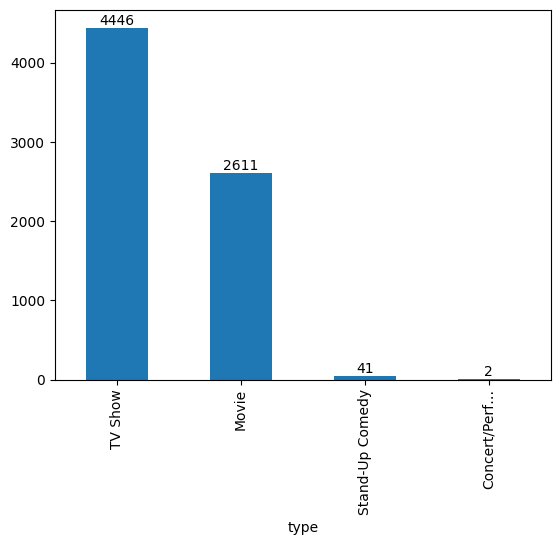

In [74]:
ax = df_net.type.value_counts().plot.bar()
ax.bar_label(ax.containers[0])

[Text(0, 0, '62.62'),
 Text(0, 0, '36.77'),
 Text(0, 0, '0.58'),
 Text(0, 0, '0.03')]

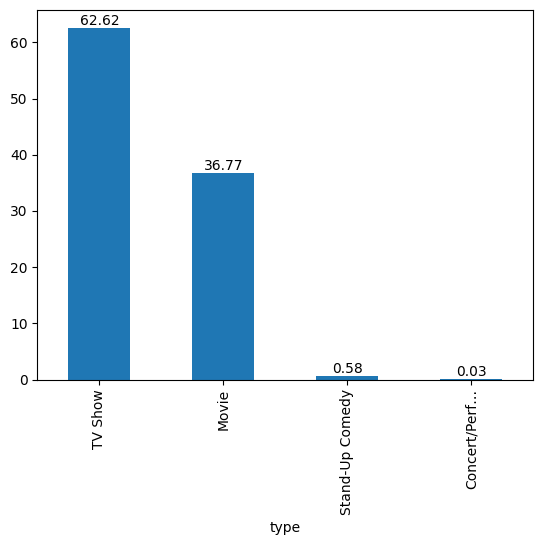

In [75]:
ax = round(df_net.type.value_counts(normalize=True) * 100,2).plot.bar()
ax.bar_label(ax.containers[0], label_type='edge')

##### Type conclusion

This dataset has four types of products, where TV Show and Movie are the most frequent reaching 62,6% and 36,7%. The rest is composed by Stand Up Comedy show and concerts.

#### Netflix Exclusive

In [76]:
df_net.netflix_exclusive.unique()

array(['Yes', 'Not Informed'], dtype=object)

In [77]:
df_net.netflix_exclusive.value_counts()

netflix_exclusive
Yes             4599
Not Informed    2501
Name: count, dtype: int64

In [78]:
df_net.netflix_exclusive.value_counts(normalize=True)

netflix_exclusive
Yes             0.647746
Not Informed    0.352254
Name: proportion, dtype: float64

[Text(0, 0, '4599'), Text(0, 0, '2501')]

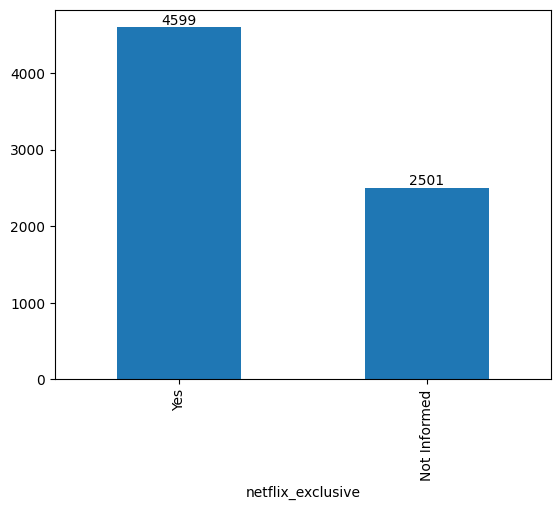

In [79]:
ax = df_net.netflix_exclusive.value_counts().plot.bar()
ax.bar_label(ax.containers[0])

[Text(0, 0, '64.77'), Text(0, 0, '35.23')]

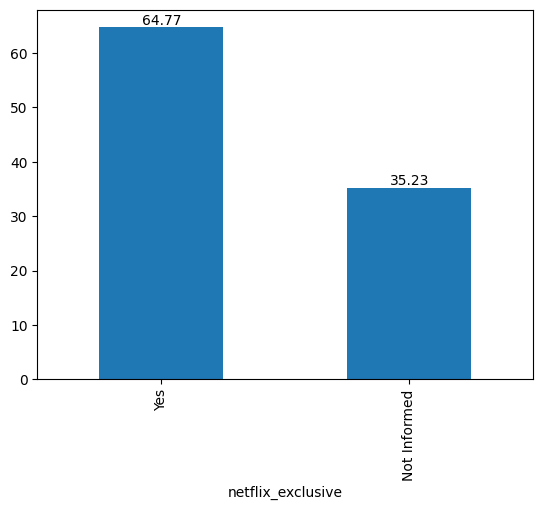

In [80]:
ax = round(df_net.netflix_exclusive.value_counts(normalize=True) * 100 ,2).plot.bar()
ax.bar_label(ax.containers[0])

##### Netflix Exclusive Conclusion

When the subject is exclusiveness, 64.7% of this dataset are netflix exclusive products. The rest are not informed, but we could assume that they're not exclusive.

#### Time window

In [81]:
df_net.date_ref.nunique()

710

In [82]:
df_net.date_ref.min()

'2020-04-01'

In [83]:
df_net.date_ref.max()

'2022-03-11'

This dataset contains data from January 4th, 2020 up to March 11th, 2022, counting 710 days

#### Movies

In [84]:
df_net.title.nunique()

645

### Days In Top 10

total_rank         Axes(0.125,0.11;0.227941x0.77)
day_top_ten     Axes(0.398529,0.11;0.227941x0.77)
viewer_score    Axes(0.672059,0.11;0.227941x0.77)
dtype: object

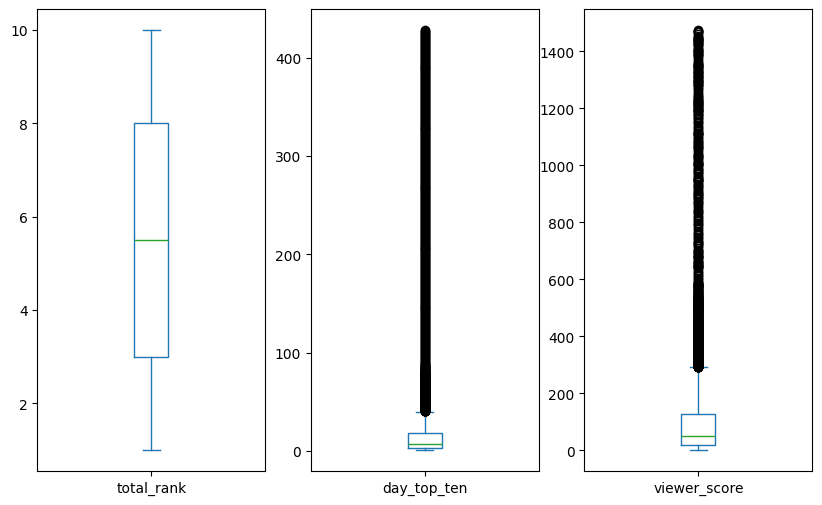

In [92]:
df_net.plot(kind='box', figsize=(10,6), subplots=True)

## Outliers

In [94]:
# Movies with 100 or more days ins top 10
df_net[df_net.day_top_ten >= 100]

,date_ref,total_rank,rank_ytd,rank_last_week,title,type,netflix_exclusive,netflix_realease_date,day_top_ten,viewer_score
2886,2021-01-14,7,6,8,Cocomelon,TV Show,Not Informed,"Jun 1, 2020",100,287
2896,2021-01-15,7,7,10,Cocomelon,TV Show,Not Informed,"Jun 1, 2020",101,291
2909,2021-01-16,10,7,9,Cocomelon,TV Show,Not Informed,"Jun 1, 2020",102,292
2919,2021-01-17,10,10,9,Cocomelon,TV Show,Not Informed,"Jun 1, 2020",103,293
3019,2021-01-27,10,-,-,Cocomelon,TV Show,Not Informed,"Jun 1, 2020",104,294
...,...,...,...,...,...,...,...,...,...,...
6674,2022-01-28,5,6,-,Cocomelon,TV Show,Not Informed,"Jun 1, 2020",424,1466
6687,2022-01-29,8,5,8,Cocomelon,TV Show,Not Informed,"Jun 1, 2020",425,1469
6718,2022-02-01,9,-,7,Cocomelon,TV Show,Not Informed,"Jun 1, 2020",426,1471
6959,2022-02-25,10,-,-,Cocomelon,TV Show,Not Informed,"Jun 1, 2020",427,1472


In [95]:
# How many times each movie showed up in top 10
df_net.title.value_counts()

title
Cocomelon                       428
Ozark                            85
Cobra Kai                        81
Manifest                         80
The Queenâs Gambit             73
                               ... 
The Office                        1
Animals on the Loose: A You…      1
Dark                              1
The Secret Life of Pets 2         1
Step Up Revolution                1
Name: count, Length: 645, dtype: int64

<Axes: >

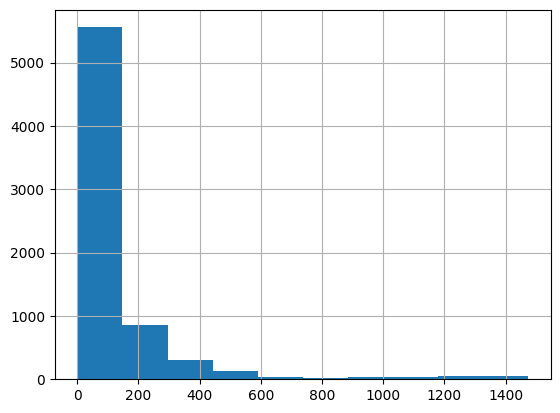

In [96]:
# frequency of films based on viewership score
df_net.viewer_score.hist()

In [97]:
# who's the movie with the highest viewership score
df_net[df_net.viewer_score == df_net.viewer_score.max()]

,date_ref,total_rank,rank_ytd,rank_last_week,title,type,netflix_exclusive,netflix_realease_date,day_top_ten,viewer_score
6998,2022-03-01,9,-,-,Cocomelon,TV Show,Not Informed,"Jun 1, 2020",428,1474
